# Evaluate the cross validation of different mass balance hyper parameters
The data file is produced by the VAS adapted cross validation module (https://github.com/oberrauch/mb_crossval) originally from Matze (https://github.com/OGGM/mb_crossval).

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read dictionary
path = '/Users/oberrauch/mb_crossval/data/xval/xval_1.1.2.dev44+gf9ab669-histalp_major.p'
xvaldict = pickle.load(open(path, "rb"))

In [4]:
# get dataframe
stats = xvaldict['statistic']
# remove temperature gradient, since it is constant (-0.0065 K/m)
stats = stats.drop('tgrad', axis=1)
stats.head()

,prcpsf,tliq,tmelt,std_quot,bias,rmse,core,std_oggm,std_ref,nans
0,1.5,1,-2,0.53561,54.5083,276.3,0.630709,353.762,660.483,0
1,1.5,1,-1.75,0.547653,36.1525,283.222,0.632451,361.715,660.483,0
2,1.5,1,-1.5,0.556322,36.3591,280.444,0.634298,367.441,660.483,0
3,1.5,1,-1.25,0.564546,34.8341,278.638,0.635844,372.873,660.483,0
4,1.5,1,-1,0.578597,19.5265,272.345,0.637201,382.154,660.483,0


**Compute scores for the statistical measures**

0.8166430429845093


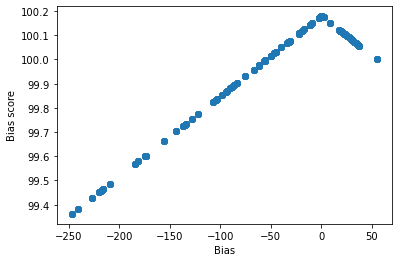

In [10]:
stats['bias_score'] = (stats.bias.max() - abs(stats.bias))/(stats.bias.max() - stats.bias.min()) + 100
plt.scatter(stats.bias, stats.bias_score)
plt.xlabel('Bias')
plt.ylabel('Bias score')
print(stats.bias_score.max()-stats.bias_score.min())

1.0


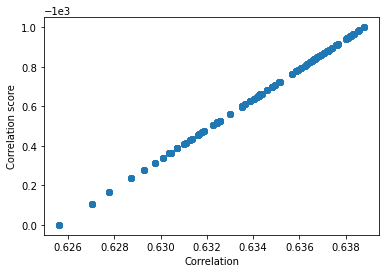

In [14]:
stats['core_score'] = (abs(stats.core) - stats.core.min())/(stats.core.max() - stats.core.min()) - 1000
plt.scatter(stats.core, stats.core_score)
plt.xlabel('Correlation')
plt.ylabel('Correlation score')
print(stats.core_score.max()-stats.core_score.min())

0.5135390547906871


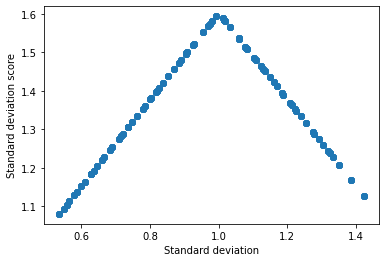

In [12]:
stats['std_quot_score'] = (stats.std_quot.max() - abs(stats.std_quot - 1))/(stats.std_quot.max() - stats.std_quot.min())
plt.scatter(stats.std_quot, stats.std_quot_score)
plt.xlabel('Standard deviation')
plt.ylabel('Standard deviation score')
print(stats.std_quot_score.max()-stats.std_quot_score.min())

Text(0, 0.5, 'RMSE score')

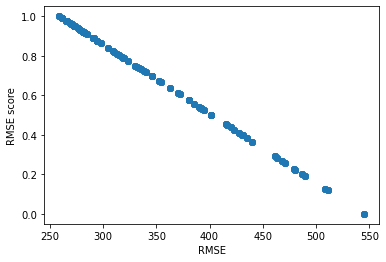

In [17]:
stats['rmse_score'] = (stats.rmse.max() - stats.rmse)/(stats.rmse.max() - stats.rmse.min())
plt.scatter(stats.rmse, stats.rmse_score)
plt.xlabel('RMSE')
plt.ylabel('RMSE score')

The scores have different ranges, the highest number are found for the standard deviation score and the lowest for the bias score. Hence, the former has the highest weight and the latter the lowest. That seems odd...

**Compute overall score as sum of individual scores**, whereby higher values indicate better performance

In [9]:
stats['score'] = stats.std_quot_score + stats.bias_score + stats.core_score
stats.sort_values('score', ascending=False).head(10)

,prcpsf,tliq,tmelt,std_quot,bias,rmse,core,std_oggm,std_ref,nans,bias_score,core_score,std_quot_score,score
186,2.5,1,-0.5,0.981936,-57.0364,354.49,0.638179,648.552,660.483,0,-0.00839273,0.954412,1.58264,2.52866
222,2.5,3,-0.5,0.981936,-57.0364,354.49,0.638179,648.552,660.483,0,-0.00839273,0.954412,1.58264,2.52866
213,2.5,2.5,-0.5,0.981936,-57.0364,354.49,0.638179,648.552,660.483,0,-0.00839273,0.954412,1.58264,2.52866
204,2.5,2,-0.5,0.981936,-57.0364,354.49,0.638179,648.552,660.483,0,-0.00839273,0.954412,1.58264,2.52866
195,2.5,1.5,-0.5,0.981936,-57.0364,354.49,0.638179,648.552,660.483,0,-0.00839273,0.954412,1.58264,2.52866
221,2.5,3,-0.75,0.968122,-75.6843,345.881,0.638214,639.428,660.483,0,-0.0702985,0.957025,1.56709,2.45382
212,2.5,2.5,-0.75,0.968122,-75.6843,345.881,0.638214,639.428,660.483,0,-0.0702985,0.957025,1.56709,2.45382
203,2.5,2,-0.75,0.968122,-75.6843,345.881,0.638214,639.428,660.483,0,-0.0702985,0.957025,1.56709,2.45382
194,2.5,1.5,-0.75,0.968122,-75.6843,345.881,0.638214,639.428,660.483,0,-0.0702985,0.957025,1.56709,2.45382
185,2.5,1,-0.75,0.968122,-75.6843,345.881,0.638214,639.428,660.483,0,-0.0702985,0.957025,1.56709,2.45382


In [18]:
stats['score'] = stats.std_quot_score + stats.bias_score + stats.core_score + stats.rmse_score
stats.sort_values('score', ascending=False).head(10)

,prcpsf,tliq,tmelt,std_quot,bias,rmse,core,std_oggm,std_ref,nans,bias_score,core_score,std_quot_score,score,rmse_score
61,1.75,1.5,-0.25,0.714564,-11.4999,265.881,0.638081,471.958,660.483,0,100.143,-999.053,1.28164,-896.653,0.975577
70,1.75,2,-0.25,0.714564,-11.4999,265.881,0.638081,471.958,660.483,0,100.143,-999.053,1.28164,-896.653,0.975577
88,1.75,3,-0.25,0.714564,-11.4999,265.881,0.638081,471.958,660.483,0,100.143,-999.053,1.28164,-896.653,0.975577
52,1.75,1,-0.25,0.714564,-11.4999,265.881,0.638081,471.958,660.483,0,100.143,-999.053,1.28164,-896.653,0.975577
79,1.75,2.5,-0.25,0.714564,-11.4999,265.881,0.638081,471.958,660.483,0,100.143,-999.053,1.28164,-896.653,0.975577
69,1.75,2,-0.5,0.69005,18.6203,273.408,0.638779,455.766,660.483,0,100.119,-999,1.25404,-896.678,0.949249
87,1.75,3,-0.5,0.69005,18.6203,273.408,0.638779,455.766,660.483,0,100.119,-999,1.25404,-896.678,0.949249
51,1.75,1,-0.5,0.69005,18.6203,273.408,0.638779,455.766,660.483,0,100.119,-999,1.25404,-896.678,0.949249
78,1.75,2.5,-0.5,0.69005,18.6203,273.408,0.638779,455.766,660.483,0,100.119,-999,1.25404,-896.678,0.949249
60,1.75,1.5,-0.5,0.69005,18.6203,273.408,0.638779,455.766,660.483,0,100.119,-999,1.25404,-896.678,0.949249


All of the ten highest scores result from using a **precipiation scaling factor of 2.5**, and the five highest scores result from additionally using a **temperature threshold for melting of -0.5 degC**. The temperature threshold for liwuid precipitation seems to have no effect...

**Confirm findings graphically**

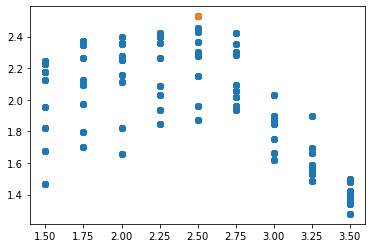

In [9]:
# plot score as function of precipitation scaling factor
plt.scatter(stats.prcpsf, stats.score)
plt.scatter(stats.prcpsf.where(stats.score == stats.score.max()).dropna().iloc[0], stats.score.max())

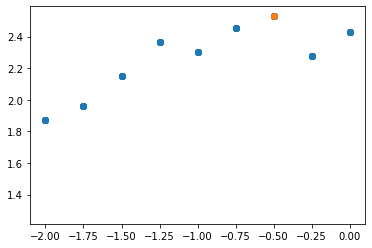

In [10]:
# subset for precipitation scaling factor of 2.5 and
# plot score as function of temperature threshold for melt
plt.scatter(stats.where(stats.prcpsf == 2.5).tmelt, stats.score)
plt.scatter(stats.tmelt.where(stats.score == stats.score.max()).dropna().iloc[0], stats.score.max())

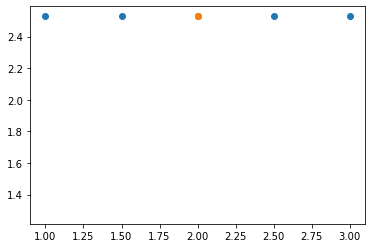

In [11]:
# subset for precipitation scaling factor of 2.5 and 
# temperature threshold for melt of -0.5 degC and
# plot score as function of temperature threshold for liquid precipitations
plt.scatter(stats.where((stats.prcpsf == 2.5) & (stats.tmelt == -0.5)).tliq, stats.score)
plt.scatter(stats.tliq.where(stats.score == stats.score.max()).dropna().iloc[2], stats.score.max())